# Reading netcdf4 files (LHM uitvoer)

In [38]:
'''
NAME
    NetCDF with Python
PURPOSE
    To demonstrate how to read and write data with NetCDF files using
    a NetCDF file from the NCEP/NCAR Reanalysis.
    Plotting using Matplotlib and Basemap is also shown.
PROGRAMMER(S)
    Chris Slocum
REVISION HISTORY
    20140320 -- Initial version created and posted online
    20140722 -- Added basic error handling to ncdump
                Thanks to K.-Michael Aye for highlighting the issue
REFERENCES
    netcdf4-python -- http://code.google.com/p/netcdf4-python/
    NCEP/NCAR Reanalysis -- Kalnay et al. 1996
        http://dx.doi.org/10.1175/1520-0477(1996)077<0437:TNYRP>2.0.CO;2
'''
import datetime as dt  # Python standard library datetime  module
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid


def ncdump(nc_fid, verb=True):
    '''
    ncdump outputs dimensions, variables and their attribute information.
    The information is similar to that of NCAR's ncdump utility.
    ncdump requires a valid instance of Dataset.

    Parameters
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    verb : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print("\t\ttype:", repr(nc_fid.variables[key].dtype))
            for ncattr in nc_fid.variables[key].ncattrs():
                print(f'\t\t{ncattr}:',\
                      repr(nc_fid.variables[key].getncattr(ncattr)))
        except KeyError:
            print(f"\t\tWARNING: {key} does not contain variable attributes")

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print("NetCDF Global Attributes:")
        for nc_attr in nc_attrs:
            print (f'\t{nc_attr}:', repr(nc_fid.getncattr(nc_attr)))
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # Dimension shape information.
    if verb:
        print ("NetCDF dimension information:")
        for dim in nc_dims:
            print ("\tName:", dim) 
            print ("\t\tsize:", len(nc_fid.dimensions[dim]))
            print_ncattr(dim)
    # Variable information.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if verb:
        print ("NetCDF variable information:")
        for var in nc_vars:
            if var not in nc_dims:
                print ('\tName:', var)
                print ("\t\tdimensions:", nc_fid.variables[var].dimensions)
                print ("\t\tsize:", nc_fid.variables[var].size)
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars

nc_f = '/Users/Theo/downloads/ghg_1998-2006_l1.nc'  # Your filename
nc_fid = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
# nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)
# # Extract data from NetCDF file
# lats = nc_fid.variables['lat'][:]  # extract/copy the data
# lons = nc_fid.variables['lon'][:]
# time = nc_fid.variables['time'][:]
# air = nc_fid.variables['air'][:]  # shape is time, lat, lon as shown above

# time_idx = 237  # some random day in 2012
# # Python and the renalaysis are slightly off in time so this fixes that problem
# offset = dt.timedelta(hours=48)
# # List of all times in the file as datetime objects
# dt_time = [dt.date(1, 1, 1) + dt.timedelta(hours=t) - offset\
#            for t in time]
# cur_time = dt_time[time_idx]

# # Plot of global temperature on our random day
# fig = plt.figure()
# fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
# # Setup the map. See http://matplotlib.org/basemap/users/mapsetup.html
# # for other projections.
# m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
#             llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
# m.drawcoastlines()
# m.drawmapboundary()
# # Make the plot continuous
# air_cyclic, lons_cyclic = addcyclic(air[time_idx, :, :], lons)
# # Shift the grid so lons go from -180 to 180 instead of 0 to 360.
# air_cyclic, lons_cyclic = shiftgrid(180., air_cyclic, lons_cyclic, start=False)
# # Create 2D lat/lon arrays for Basemap
# lon2d, lat2d = np.meshgrid(lons_cyclic, lats)
# # Transforms lat/lon into plotting coordinates for projection
# x, y = m(lon2d, lat2d)
# # Plot of air temperature with 11 contour intervals
# cs = m.contourf(x, y, air_cyclic, 11, cmap=plt.cm.Spectral_r)
# cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
# cbar.set_label("%s (%s)" % (nc_fid.variables['air'].var_desc,\
#                             nc_fid.variables['air'].units))
# plt.title("%s on %s" % (nc_fid.variables['air'].var_desc, cur_time))

# # Writing NetCDF files
# # For this example, we will create two NetCDF4 files. One with the global air
# # temperature departure from its value at Darwin, Australia. The other with
# # the temperature profile for the entire year at Darwin.
# darwin = {'name': 'Darwin, Australia', 'lat': -12.45, 'lon': 130.83}

# # Find the nearest latitude and longitude for Darwin
# lat_idx = np.abs(lats - darwin['lat']).argmin()
# lon_idx = np.abs(lons - darwin['lon']).argmin()

# # Simple example: temperature profile for the entire year at Darwin.
# # Open a new NetCDF file to write the data to. For format, you can choose from
# # 'NETCDF3_CLASSIC', 'NETCDF3_64BIT', 'NETCDF4_CLASSIC', and 'NETCDF4'
# w_nc_fid = Dataset('darwin_2012.nc', 'w', format='NETCDF4')
# w_nc_fid.description = "NCEP/NCAR Reanalysis %s from its value at %s. %s" %\
#                       (nc_fid.variables['air'].var_desc.lower(),\
#                        darwin['name'], nc_fid.description)
# # Using our previous dimension info, we can create the new time dimension
# # Even though we know the size, we are going to set the size to unknown
# w_nc_fid.createDimension('time', None)
# w_nc_dim = w_nc_fid.createVariable('time', nc_fid.variables['time'].dtype,\
#                                    ('time',))
# # You can do this step yourself but someone else did the work for us.
# for ncattr in nc_fid.variables['time'].ncattrs():
#     w_nc_dim.setncattr(ncattr, nc_fid.variables['time'].getncattr(ncattr))
# # Assign the dimension data to the new NetCDF file.
# w_nc_fid.variables['time'][:] = time
# w_nc_var = w_nc_fid.createVariable('air', 'f8', ('time'))
# w_nc_var.setncatts({'long_name': u"mean Daily Air temperature",\
#                     'units': u"degK", 'level_desc': u'Surface',\
#                     'var_desc': u"Air temperature",\
#                     'statistic': u'Mean\nM'})
# w_nc_fid.variables['air'][:] = air[time_idx, lat_idx, lon_idx]
# w_nc_fid.close()  # close the new file

# # A plot of the temperature profile for Darwin in 2012
# fig = plt.figure()
# plt.plot(dt_time, air[:, lat_idx, lon_idx], c='r')
# plt.plot(dt_time[time_idx], air[time_idx, lat_idx, lon_idx], c='b', marker='o')
# plt.text(dt_time[time_idx], air[time_idx, lat_idx, lon_idx], cur_time,\
#          ha='right')
# fig.autofmt_xdate()
# plt.ylabel("%s (%s)" % (nc_fid.variables['air'].var_desc,\
#                         nc_fid.variables['air'].units))
# plt.xlabel("Time")
# plt.title("%s from\n%s for %s" % (nc_fid.variables['air'].var_desc,\
#                                   darwin['name'], cur_time.year))

# # Complex example: global temperature departure from its value at Darwin
# departure = air[:, :, :] - air[:, lat_idx, lon_idx].reshape((time.shape[0],\
#                                                              1, 1))

# # Open a new NetCDF file to write the data to. For format, you can choose from
# # 'NETCDF3_CLASSIC', 'NETCDF3_64BIT', 'NETCDF4_CLASSIC', and 'NETCDF4'
# w_nc_fid = Dataset('air.departure.sig995.2012.nc', 'w', format='NETCDF4')
# w_nc_fid.description = "The departure of the NCEP/NCAR Reanalysis " +\
#                       "%s from its value at %s. %s" %\
#                       (nc_fid.variables['air'].var_desc.lower(),\
#                        darwin['name'], nc_fid.description)
# # Using our previous dimension information, we can create the new dimensions
# data = {}
# for dim in nc_dims:
#     w_nc_fid.createDimension(dim, nc_fid.variables[dim].size)
#     data[dim] = w_nc_fid.createVariable(dim, nc_fid.variables[dim].dtype,\
#                                         (dim,))
#     # You can do this step yourself but someone else did the work for us.
#     for ncattr in nc_fid.variables[dim].ncattrs():
#         data[dim].setncattr(ncattr, nc_fid.variables[dim].getncattr(ncattr))
# # Assign the dimension data to the new NetCDF file.
# w_nc_fid.variables['time'][:] = time
# w_nc_fid.variables['lat'][:] = lats
# w_nc_fid.variables['lon'][:] = lons

# # Ok, time to create our departure variable
# w_nc_var = w_nc_fid.createVariable('air_dep', 'f8', ('time', 'lat', 'lon'))
# w_nc_var.setncatts({'long_name': u"mean Daily Air temperature departure",\
#                     'units': u"degK", 'level_desc': u'Surface',\
#                     'var_desc': u"Air temperature departure",\
#                     'statistic': u'Mean\nM'})
# w_nc_fid.variables['air_dep'][:] = departure
# w_nc_fid.close()  # close the new file

# # Rounded maximum absolute value of the departure used for contouring
# max_dep = np.round(np.abs(departure[time_idx, :, :]).max()+5., decimals=-1)

# # Generate a figure of the departure for a single day
# fig = plt.figure()
# fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
# m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
#             llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
# m.drawcoastlines()
# m.drawmapboundary()
# dep_cyclic, lons_cyclic = addcyclic(departure[time_idx, :, :], lons)
# dep_cyclic, lons_cyclic = shiftgrid(180., dep_cyclic, lons_cyclic, start=False)
# lon2d, lat2d = np.meshgrid(lons_cyclic, lats)
# x, y = m(lon2d, lat2d)
# levels = np.linspace(-max_dep, max_dep, 11)
# cs = m.contourf(x, y, dep_cyclic, levels=levels, cmap=plt.cm.bwr)
# x, y = m(darwin['lon'], darwin['lat'])
# plt.plot(x, y, c='c', marker='o')
# plt.text(x, y, 'Darwin,\nAustralia', color='r', weight='semibold')
# cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
# cbar.set_label("%s departure (%s)" % (nc_fid.variables['air'].var_desc,\
#                             nc_fid.variables['air'].units))
# plt.title("Departure of Global %s from\n%s for %s" %\
#           (nc_fid.variables['air'].var_desc, darwin['name'], cur_time))
# plt.show()

# # Close original NetCDF file.
# nc_fid.close()

In [43]:
attribs(nc_fid)

['Conventions',
 'GDAL',
 'GDAL_AREA_OR_POINT',
 'GDAL_META-TAG',
 'acknowledgment',
 'cdm_data_type',
 'close',
 'cmptypes',
 'comment',
 'coordinate_system',
 'createCompoundType',
 'createDimension',
 'createEnumType',
 'createGroup',
 'createVLType',
 'createVariable',
 'creator_email',
 'creator_name',
 'creator_url',
 'data_model',
 'date_created',
 'delncattr',
 'dimensions',
 'disk_format',
 'enumtypes',
 'file_format',
 'filepath',
 'geospatial_lat_max',
 'geospatial_lat_min',
 'geospatial_lat_resolution',
 'geospatial_lat_units',
 'geospatial_lon_max',
 'geospatial_lon_min',
 'geospatial_lon_resolution',
 'geospatial_lon_units',
 'geospatial_vertical_max',
 'geospatial_vertical_min',
 'geospatial_vertical_resolution',
 'geospatial_vertical_units',
 'get_variables_by_attributes',
 'getncattr',
 'groups',
 'history',
 'id',
 'institution',
 'isopen',
 'keepweakref',
 'keywords_vocabulary',
 'license',
 'naming_authority',
 'ncattrs',
 'parent',
 'path',
 'processing_level',
 'p

In [39]:
attribs = lambda obj: [o for o in dir(obj) if not o.startswith('_')]

In [46]:
nc_fid.variables.keys()

odict_keys(['crs', 'lat', 'lon', 'Band1'])

In [65]:
nx = nc_fid.variables['lon'][:].size
ny = nc_fid.variables['lat'][:].size
x = nc_fid.variables['lon'][:]
y = nc_fid.variables['lat'][:]
ghg = nc_fid.variables['Band1'][:].reshape((ny, nx))
ghg[ghg==nc_fid.variables['Band1'].nodataval] = np.nan

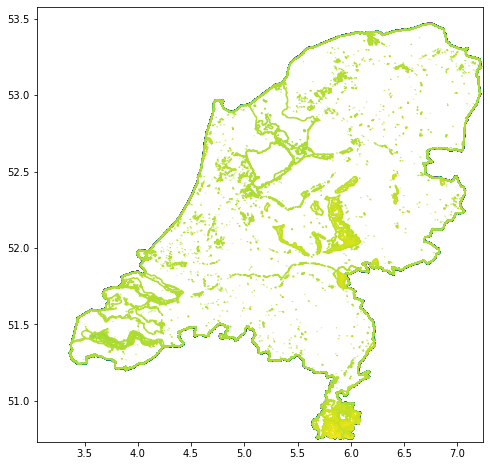

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.contour(x, y, ghg, levels=100)

In [71]:
np.sum(nc_fid.variables['Band1'][:][nc_fid.variables['Band1'][:] == nc_fid.variables['Band1'].nodataval])

masked

In [82]:
nc_fid.variables['Band1'][:].data.min()

-999.99

In [75]:
attribs(nc_fid.variables['Band1'][:])

['T',
 'all',
 'anom',
 'any',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'astype',
 'base',
 'baseclass',
 'byteswap',
 'choose',
 'clip',
 'compress',
 'compressed',
 'conj',
 'conjugate',
 'copy',
 'count',
 'ctypes',
 'cumprod',
 'cumsum',
 'data',
 'diagonal',
 'dot',
 'dtype',
 'dump',
 'dumps',
 'fill',
 'fill_value',
 'filled',
 'flags',
 'flat',
 'flatten',
 'get_fill_value',
 'get_imag',
 'get_real',
 'getfield',
 'harden_mask',
 'hardmask',
 'ids',
 'imag',
 'iscontiguous',
 'item',
 'itemset',
 'itemsize',
 'mask',
 'max',
 'mean',
 'min',
 'mini',
 'nbytes',
 'ndim',
 'newbyteorder',
 'nonzero',
 'partition',
 'prod',
 'product',
 'ptp',
 'put',
 'ravel',
 'real',
 'recordmask',
 'repeat',
 'reshape',
 'resize',
 'round',
 'searchsorted',
 'set_fill_value',
 'setfield',
 'setflags',
 'shape',
 'sharedmask',
 'shrink_mask',
 'size',
 'soften_mask',
 'sort',
 'squeeze',
 'std',
 'strides',
 'sum',
 'swapaxes',
 'take',
 'tobytes',
 'tofile',
 'toflex',
 'tolist',
 '

In [40]:
#methods(Dataset)
attribs(Dataset)

['close',
 'cmptypes',
 'createCompoundType',
 'createDimension',
 'createEnumType',
 'createGroup',
 'createVLType',
 'createVariable',
 'data_model',
 'delncattr',
 'dimensions',
 'disk_format',
 'enumtypes',
 'file_format',
 'filepath',
 'get_variables_by_attributes',
 'getncattr',
 'groups',
 'isopen',
 'keepweakref',
 'ncattrs',
 'parent',
 'path',
 'renameAttribute',
 'renameDimension',
 'renameGroup',
 'renameVariable',
 'set_always_mask',
 'set_auto_chartostring',
 'set_auto_mask',
 'set_auto_maskandscale',
 'set_auto_scale',
 'set_fill_off',
 'set_fill_on',
 'setncattr',
 'setncattr_string',
 'setncatts',
 'sync',
 'variables',
 'vltypes']

In [33]:
Dataset.get_variables_by_attributes(axis=lambda v: v in ['X', 'Y', 'Z', 'T'])

TypeError: descriptor 'get_variables_by_attributes' of 'netCDF4._netCDF4.Dataset' object needs an argument

In [20]:
#callable(Dataset.getncattr)
[o for o in dir(Dataset)]

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__orthogonal_indexing__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_close',
 '_enddef',
 '_grpid',
 '_isopen',
 '_redef',
 'close',
 'cmptypes',
 'createCompoundType',
 'createDimension',
 'createEnumType',
 'createGroup',
 'createVLType',
 'createVariable',
 'data_model',
 'delncattr',
 'dimensions',
 'disk_format',
 'enumtypes',
 'file_format',
 'filepath',
 'get_variables_by_attributes',
 'getncattr',
 'groups',
 'isopen',
 'keepweakref',
 'ncattrs',
 'parent',
 'path',
 'renameAttribute',
 'renameDimension',
 'renameGroup',
 'renameVariable',
 'set_always_mask',
 'set_auto_chartostring',
 'set_auto_mask',
 'set_auto_maskands